## Imports

In [11]:
import numpy as np
from scipy.special import comb
from scipy.special import factorial
from collections import Counter

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1.5)

## Notes:

### Jointly Distributed Random Variables:
Let $X$ and $Y$ be two discrete random variables that map an outcome of an experiment $s_i$ to a value in the plane. Hence we have the mapping (i.e. the **random vector**):

$$
\begin{bmatrix}
X(s_i) \\
Y(s_i)
\end{bmatrix}
=
\begin{bmatrix}
x_i \\
y_i
\end{bmatrix}
$$

for all $s_i\in S$. If $X$ takes on values in $S_X = \{x_1,\dots,x_{N_X}\}$ and $Y$ takes on values in $S_Y = \{y_1,\dots,y_{N_Y}\}$ then the random vector can take on values in 

$$
S_{X,Y} = S_X \times S_Y = \{(x_i,y_j):i=1,\dots,N_X; j=1,\dots,N_Y \}
$$

for a total of $N_{X,Y} = N_X N_Y$ values.

#### Standardization:
A standardized random variable is one for which the mean is zero and the variance is one. Any random variable can be standarized by the following:

$$
X_s = \frac{X - \mathbb{E}_{X}[X]}{\sqrt{var(X)}}
$$

***
### Joint (Bivariate) PMF:
For a *one-to-one* mapping from $S$ to $S_{X,Y}$ we have

$$
\begin{equation}
    \begin{split}
        p_{X,Y}[x_i,y_j] &= P[X(s)=x_i, Y(s)=y_j]\\
                     \\
                     &= P[\{s: X(s)=x_i, Y(s)=y_j\}]\\
                     \\
                     &= P[\{s_k\}]
    \end{split}
\end{equation}
$$

where it is assumed that $s_k$ is the only solution to $X(s)=x_i$ and $Y(s)=y_j$. For a *many-to-one*  transformation the joint PMF is 

$$
p_{X,Y}[x_i,y_j] = \sum_{\{k: X(x_k)=x_i, Y(s_k)=y_j\}} P[\{s_k\}].
$$

Note: Be careful of a simplified notation! $p_{X,Y}[x_i,y_j]$ and $p_{X,Y}[i,j]$ are **different**. The former is in terms of the elements of the random vector's support so in it's PMF $i$ and $j$ will index the elements and range from $1$ to $N_X$ or $N_Y$, respectively. However, the latter is treating $i$ and $j$ as the actual values of the mapped outcomes, so the sum in the PMF will look different (even though the information overall is the same).

#### Marginal PMFs:
Can be recovered from the joint PMF

$$
\begin{equation}
    \begin{split}
        p_X[x_k] &= \sum_{j=1}^{\infty}{ p_{X,Y}[x_k, y_j] } \\
                 \\
        p_Y[y_k] &= \sum_{i=1}^{\infty}{ p_{X,Y}[x_i, y_k] }
    \end{split}
\end{equation}
$$

however *the joint PMF cannot be recovered from the marginals.* There are an infinite number of joint PMFs that have the same marginal PMFs.

##### Properties
- $0\leq p_{X,Y}[x_i,y_j] \leq 1$


- $\sum_{i=1}^{N_X}\sum_{j=1}^{N_Y}{p_{X,Y}[x_i,y_j]} = 1$ for $i=1,2,\dots,N_X$ and $j=1,2,\dots,N_Y$

#### Probabilities of Events 

On $S_{X,Y}$ we have:

$$
P[(X,Y)\in A] = \sum_{ \{(i,j): (x_i,y_j)\in A\} }p_{X,Y}[x_i,y_j]
$$

***
### Joint (Bivariate) CDF:

Defined for a random vector $[X,Y]^T$ as

$$
\begin{equation}
    \begin{split}
        F_{X,Y}(x,y) &= P[X\leq x, Y\leq y]\\
                     \\
                     &= {\sum\sum}_{\{(i,j): x_i\leq x, y_j\leq y\}} p_{X,Y}[x_i,y_j]
    \end{split}
\end{equation}
$$

#### Marginal CDFs:
Can be recovered from the joint CDF

$$
F_X(x) = P[X\leq x, Y < \infty] = F_{X,Y}(x, \infty)
$$

$$
F_Y(y) =  P[X < \infty, Y \leq y] = F_{X,Y}(\infty, y)
$$

however *the joint PMF cannot be recovered from the marginals.* There are an infinite number of joint PMFs that have the same marginal PMFs.

#### Properties
- $0\leq F_{X,Y}(x,y) \leq 1$

- $F_{X,Y}(-\infty,-\infty) = 0$ and $F_{X,Y}(\infty,\infty) = 1$

- $F_{X,Y}(x,y)$ is monotonically increasing 

- $F_{X,Y}(x,y)$ is right-continuous

- To recover the PMF we can use

$$
p_{X,Y}[x_i,y_j] = F_{X,Y}(x_i^+,y_j^+) - F_{X,Y}(x_i^+,y_j^-) - F_{X,Y}(x_i^-,y_j^+) + F_{X,Y}(x_i^-,y_j^-)
$$

***
### Transformations of Muliple Discrete RVs
#### (Part I):

With two discrete RVs $X,Y$ that are transformed into $W=g(X,Y)$ and $Z=h(X,Y)$ which is a mapping from $(X,Y)\rightarrow (W,Z)$ the joint PMF will be:

$$
p_{W,Z}[w_i,z_j] = \underset {\bigg\{(k,l): \begin{split} g(x_k,y_l)&=w_i \\ h(x_k,y_l)&=z_j \end{split}\bigg\} } {\sum\sum}{p_{X,Y}[x_k,y_l]}
$$

for $i=1,2,\dots,N_W$ and $j=1,2,\dots,N_Z$.


#### (Part II):

When trying to determine the PMF $Z=h(X,Y)$ only, which is a mapping from $(X,Y)\rightarrow Z$, we can use an additional *auxiliary* random variable to help with the calculation. By adding another random variable $W$ the transformation changes to a mapping from $(X,Y)\rightarrow (W,Z)$. Then we can determine $p_{W,Z}[w_i,z_j]$ using the methods we previously established. Finally, the PMF we were interested in the first place is just the marginal PMF:

$$
p_Z[z_j] = \sum_{ \{i: w_i\in S_W \} } {p_{W,Z}[w_i,z_j]}
$$

We typically define the auxiliary RV to be something simple like $W=X$.


#### (Part III):

When the sample space $S_{X,Y}$ is finite it is sometimes possible to directly calculate the PMF of $Z=g(X,Y)$. To do so:
1. Determine the finite sample space $S_Z$
2. Determine which sample points $(x_i, y_j)$ in $S_{X,Y}$ map into each $z_k\in S_Z$
3. Sum the probabilities of those $(x_i, y_j)$ sample points to yield $p_Z[z_k]$.

Mathematically this translates to:

$$
p_Z[z_k] = \underset { \{(i,j): z_k=g(x_i,y_j)\} }{\sum\sum}{p_{X,Y}[x_i,y_j]}
$$

***
### Expected Values:
If $Z=g(X,Y)$ then

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[Z] &= \sum_{k}{z_{k} p_{Z}[z_k]} \\
             \\
             &= \mathbb{E}_{X,Y}[g(X,Y)] \\
             \\
             &= {\sum_i\sum_j}{g(x_i,y_j) p_{X,Y}[x_i,y_j] }.
    \end{split}
\end{equation}
$$

#### Covariance:
Is a measure of how the random variables covary with respect to each other. If they vary in the same direction, then the covariance will be positive; in opposite directions, then it will be negative. It is defined as: 

$$
\begin{equation}
        \text{cov}(X,Y) = \mathbb{E}[(X - \mathbb{E}_{X}[X])(Y - \mathbb{E}_{Y}[Y])].
\end{equation}
$$

##### Properties:
- $\text{cov}(X,Y) = \mathbb{E}_{X,Y}[XY] - \mathbb{E}_{X}[X]\mathbb{E}_{Y}[Y]$
- $\text{cov}(X,X) = var(X)$
- $\text{cov}(X,Y) = \text{cov}(Y,X)$
- $\text{cov}(cX,Y) = c[\text{cov}(X,Y)]$
- $\text{cov}(X,cY) = c[\text{cov}(X,Y)]$
- $\text{cov}(X,X+Y) = \text{cov}(X,X) + \text{cov}(X,Y)$
- $\text{cov}(X+Y,X) = \text{cov}(X,X) + \text{cov}(Y,X)$
- $X,Y$ independent $\implies \text{cov}(X,Y) = 0$

***
### Prediction of a RV Outcome

Suppose we have information about the outcome of $X$, specificaly, that $X=x_i$ for each $x_i$. Then the optimal *predictor* of $Y$ is the affine function $\hat Y = a^*X + b^*$. The optimal *prediction* value will be:

$$
\begin{equation}
    \begin{split}
        \hat y_i &= a^{*}x_i + b^{*} \\
               \\
               &= \mathbb{E}_{Y}[Y] + \frac{\text{cov}(X,Y)}{var(X)var(Y)}\big(x_i - \mathbb{E}_{X}[X] \big)
    \end{split}
\end{equation}
$$

where our measure of optimality was based on minimizing the mean squared error (MSE): 

$$
mse(a, b) = \mathbb{E}_{X,Y}[(Y - \hat Y)^2].
$$

In statistics this is referred to as **simple linear regression**. The best linear predictor of $Y$ *without* the knowledge of the outcome of $X$ is given by $\hat Y = \mathbb{E}_{Y}[Y]$, which implies $\text{cov}(X,Y)=0$.

***
### Joint Characteristic Functions

***
### Correlation Coefficient:

#### Definition:
Correlation is a measure of the linear association (not necessarily causal) between two random variables. The correlation coefficient is defined as:

$$
\rho_{X,Y} = \frac{ \text{cov}(X,Y) }{ \sqrt{var(X)var(Y)} }
$$

##### Properties:
- $|\rho_{X,Y}| \leq 1$
- $\rho_{X,Y} = 0 \implies X,Y$ are said to be uncorrelated
- $\rho_{X,Y} = \pm 1 \implies X,Y $ are said to be perfectly correlated and $Y$ can be perfectly predicted from $X$ using $Y=aX+b$.
- Independence of $X,Y \implies$ uncorrelation, but the reverse is not necessarily true.

#### Estimation:

$$
\hat\rho_{X,Y} = 
\frac{\frac{1}{M}\sum_{m=1}^{M}{x_my_m - \bar{x}\bar{y}}}
{\sqrt{\big(\frac{1}{M}\sum_{m=1}^{M}{(x_m^2 - \bar{x}^2)}\big) \big(\frac{1}{M}\sum_{m=1}^{M}{(y_m^2 - \bar{y}^2)}\big)}}
$$

where

$$
\begin{equation}
    \begin{split}
        \bar{x} &= \frac{1}{M}\sum_{m=1}^{M}{x_m}\\
                \\
        \bar{y} &= \frac{1}{M}\sum_{m=1}^{M}{y_m}
    \end{split}
\end{equation}
$$

and $(x_m,y_m)$ is the $m^{th}$ realization.

***
Anywhere this picture occurs indicates a problem I need to check or finish:


![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

***
## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

### 7.1 (w)

A chess piece is placed on a chessboard, which consists of an 8x8 array of 64 squares. Specify a numerical sample space $S_{X,Y}$ for the location of the chess piece.

#### Answer:

$S_{X,Y}= \{(x_i, y_j): i=1,2,\dots,8; j=1,2,\dots,8\}$

***
### 7.2 (w)

Two coins are tossed in succession with a head being mapped into a $+1$ and a tail being mapped into a $-1$. If a random vector is defined as $(X,Y)$ with $X$ representing the mapping of the first toss and $Y$ representing the mapping of the second toss, draw the mapping. Also, what is $S_{X,Y}$?

#### Answer:

[place answer here]

***
### 7.3 😃(w)

A woman has a penny, a nickel, and a dime in her pocket. If she chooses two coins from her pocket in succession, what is the sample space $S$ of possible outcomes? If these outcomes are next mapped into the values of the coins, what is the numerical sample space $S_{X,Y}$?

#### Answer:

[place answer here]

***
### 7.4 (w)

If $S_{X} = \{1,2\}$ and $S_{Y} =\{3,4\}$, plot the points in the place comprising $S_{X,Y} = S_X\times S_Y$. What is the size of $S_{X,Y}$?

#### Answer:

[place answer here]

***
### 7.5 (w)

Two dice are tossed. The number of dots observed on the dice are added together to form the random variable $X$ and also differenced to form $Y$. Determine the possible outcomes of the random vector $(X,Y)$ and plot them in the plane. How many possible outcomes are there?

#### Answer:

[place answer here]

***
### 7.6 (f)

A two-dimensional sequence is given by 

$$
p_{X,Y}[i,j] = c(1-p_1)^i(1-p_2)^j
$$

for $i=1,2,\dots$ and $j=1,2,\dots$ , where $p_1\in(0,1),p_2\in(0,1) $ and $c$ is a constant. Find $c$ to make $p_{X,Y}$ a valid joint PMF.

#### Answer:

[place answer here]

***
### 7.7 (f)

Is

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2}\bigg)^{i+j} 
$$

for $i=0,1,2,\dots$ and $j=0,1,2,\dots$ a vaild joint PMF?

#### Answer:

[place answer here]

***
### 7.8 😃 (w)

A single coin is tossed twice. A head outcome is mapped into a $1$ and a tail outcome is mapped into a $0$ to yield a numerical outcome. Next a random vector $(X,Y)$ is defined as

- $X$ = outcome of $1^{st}$ toss $+$ outcome of $2^{nd}$ toss

- $Y$ = outcome of $1^{st}$ toss $-$ outcome of $2^{nd}$ toss

Find the joint PMF for $(X,Y)$, assuming the outcomes $(x_i,y_i)$ are equally likely.

#### Answer:

[place answer here]

***
### 7.9 (f)

Find the joint PMF for the experiment described in Example 7.1. Assume each outcome in $S$ is equally likely. How can you check your answer?

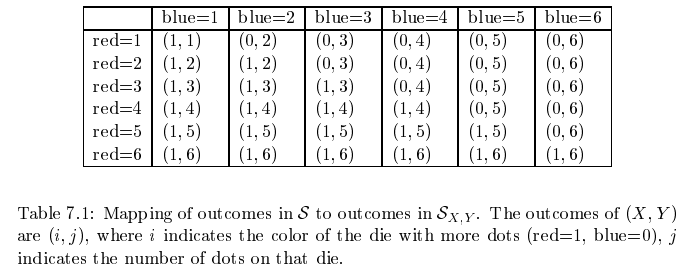

#### Answer:

[place answer here]

***
### 7.10 (f)

The sample space for a random vector is $S_{X,Y}=\{(i,j): i=1,2,3,4,5; j=1,2,3,4\}$. If the outcomes are equally likely, find $P[(X,Y)\in A]$ where $A = \{(i,j): i\in[1,2], j\in[3,4] \}$.

#### Answer:

[place answer here]

***
### 7.11 (f)

A joint PMF is given as 

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2} \bigg)^{i+j}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$. If $A = \{(i,j): 1\leq i \leq 3, j\geq2 \}$ find $P[A]$.

#### Answer:

[place answer here]

***
### 7.12 (f)

The values of a joint PMF are given in Table 7.9. Determine the marginal PMFs.

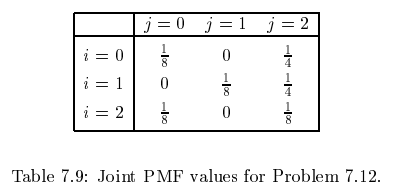

#### Answer:

[place answer here]

***
### 7.13 😃 (f)

If a joint PMF is given by 

$$
p_{X,Y}[i,j] = p^2(1-p)^{i+j-2}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$ find the marginal PMFs.

#### Answer:

[place answer here]

***
### 7.14 (f)

If a joint PMF is given by $p_{X,Y}[i,j] = \frac{1}{36}$ for $i=1,2,3,4,5,6$ and $j=1,2,3,4,5,6$ find the marginal PMFs.

#### Answer:

[place answer here]

***
### 7.15 (w)

A joint PMF is given by 

$$
p_{X,Y}[i,j] = c{10 \choose j}\bigg(\frac{1}{2}\bigg)^{10}
$$

for $i=0,1$ and $j=0,1,2,\dots,10$ where $c$ is some unknown constant. Find $c$ so that the joint PMF is valid and then determine the marginal PMFs. Hint: Recall the binomial theorem:

$$
\sum_{k=0}^{M} {M \choose k}a^{k}b^{M-k} = (a+b)^{M}
$$

#### Answer:

[place answer here]

***
### 7.16 😃 (w)

Find another set of values for the joint PMF that will yield the same marginal PMFs as given in Table 7.2.

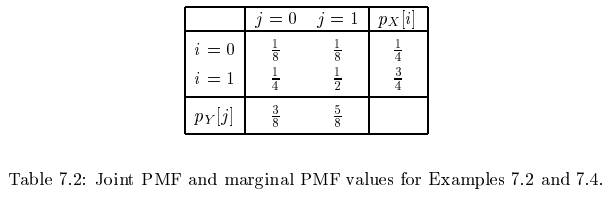

#### Answer:

[place answer here]

***
### 7.17 (t)

Prove Properties 7.3 and 7.4 for the joint CDF by relying on the standard properties of probabilities of events.

#### Answer:

[place answer here]

***
### 7.18 (w)

Sketch the joint CDF for the joint PMF given in Table 7.2. Do this by shading each region in the $x$-$y$ plane that has the same value.

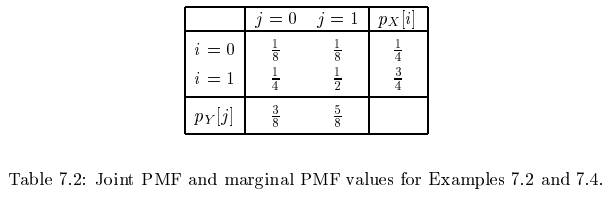

#### Answer:

[place answer here]

***
### 7.19 😃 (w)

A joint PMF is given by

$$
\begin{equation}
p_{X,Y}[i,j] = 
    \begin{cases}
        \frac{1}{4}, (i,j)=(0,0) \\
        \frac{1}{4}, (i,j)=(1,1) \\
        \frac{1}{4}, (i,j)=(1,0) \\
        \frac{1}{4}, (i,j)=(1,-1) 
    \end{cases}
\end{equation}
$$

Are $X$ and $Y$ independent?

#### Answer:

[place answer here]

***
### 7.20 (t)

Prove that if the random variables $X$ and $Y$ are independent, then the joint CDF factors as $F_{X,Y}(x,y) = F_X(x)F_Y(y)$.

#### Answer:

[place answer here]

***
### 7.21  (t)

A joint PMF is given by

$$
\begin{equation}
p_{X,Y}[i,j] = 
    \begin{cases}
        a, (i,j)=(0,0) \\
        b, (i,j)=(0,1) \\
        c, (i,j)=(1,0) \\
        d, (i,j)=(1,1) 
    \end{cases}
\end{equation}
$$

where of course we must have $a+b+c+d=1$. Show that a necessary condition for the random variables to be independent is $ad=bc$. This can be used to quickly assert that the random variables are not independent as for the case shown in Table 7.5.

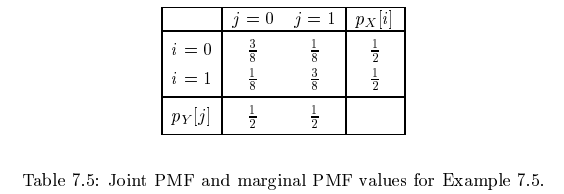

#### Answer:

[place answer here]

***
### 7.22 (f)

If $X\sim Ber(p_X)$ and $Y\sim Ber(p_Y)$, and $X$ and $Y$ are independent, what is the joint PMF?

#### Answer:

[place answer here]

***
### 7.23 😃 (w)

If the joint PMF is given by

$$
p_{X,Y}[i,j] = {10 \choose i}{11 \choose j}\bigg(\frac{1}{2}\bigg)^{21}
$$

for $i=0,1,\dots,10$ and $j=0,1,\dots,11$ are $X$ and $Y$ independent? What are the marginal PMFs?

#### Answer:

[place answer here]

***
### 7.24 (t)

Assume that $X$ and $Y$ are discretef random variables that take on all integer values and are independent. Prove that the PMF of $Z=X-Y$ is given by

$$
p_Z[l] = \sum_{k=-\infty}^{\infty}p_X[k]p_Y[k-l]
$$

for $l = \dots,-1,0,1,\dots$ by following the same procedure as was used to derive (7.22). Note that the transformation from $(X,Y)$ to $(W,Z)$ is one-to-one. Next show that if $X$ and $Y$ take on nonnegative integer values only, then 

$$
p_Z[l] = \sum_{k=\max{\{0,l\}}}^{\infty}p_X[k]p_Y[k-l]
$$

for $l = \dots,-1,0,1,\dots$.

#### Answer:

[place answer here]

***
### 7.25  (f)

Using the result of Problem 7.24 find the PMF for $Z=X-Y$ if $X\sim Pois(\lambda_X), Y\sim Pois(\lambda_Y),$ and $X$ and $Y$ are independent. Hint: The result will be in the form of infinite sums.

#### Answer:

[place answer here]

***
### 7.26 (w)

Find the PMF for $Z=\max(X,Y)$ if the joint PMF is given in Table 7.5.

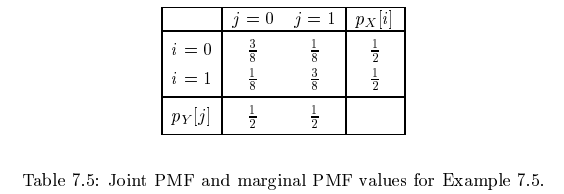

#### Answer:

[place answer here]

***
### 7.27 😃 (f)

If $X\sim Ber(\frac{1}{2}), Y\sim Ber(\frac{1}{2}),$ and $X$ and $Y$ are independent, find the PMF for $Z=X+Y$. Why does the width of the PMF get larger? Does the variance increase?

#### Answer:

[place answer here]

***
### 7.28 (t)

Prove that $\mathbb{E}_{X,Y}[g(X)] = \mathbb{E}_{X}[g(X)]$. Do $X$ and $Y$ have to be independent?

#### Answer:

[place answer here]$

***
### 7.29  (t)

Prove that 

$$
\mathbb{E}_{X,Y}[ag(X)+bh(Y)] = a\mathbb{E}_{X}[g(X)] + b\mathbb{E}_{Y}[h(Y)]
$$

#### Answer:

[place answer here]

***
### 7.30 (t)

Prove (7.31):

$$
\mathbb{E}_{X,Y}[g(X)h(Y)] = \mathbb{E}_{X}[g(X)]\mathbb{E}_{Y}[h(Y)]
$$

where $X$ and $Y$ have to be independent.

#### Answer:

[place answer here]

***
### 7.31  (t)

FInd a formula for $var(X-Y)$ similar to (7.33):

$$
var(X+Y) = var(X) + var(Y) + 2\text{cov}(X,Y).
$$

What can you say about the relationship between $var(X+Y)$ and $var(X-Y)$ if $X$ and $Y$ are uncorrelated?

#### Answer:

[place answer here]

***
### 7.32 (f)

Find the covariance for the joint PMF given in Table 7.4. How do you know the value that you obtained is correct?

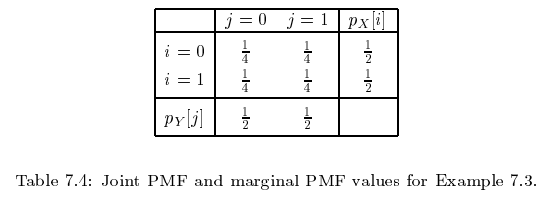

#### Answer:

[place answer here]

***
### 7.33 😃 (f)

Find the covariance for the joint PMF given in Table 7.5.

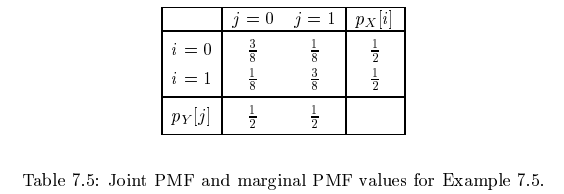

#### Answer:

[place answer here]

***
### 7.34 (t)

Prove the following properties of the covariance

$$
\begin{equation}
    \begin{split}
        \text{cov}(X,Y) &= \mathbb{E}_{X,Y}[XY] - \mathbb{E}_{X}[X]\mathbb{E}_{Y}[Y]\\
        \\
        \text{cov}(X,X) &= var(X) \\
        \\
        \text{cov}(X,Y) &= \text{cov}(Y,X) \\
        \\
        \text{cov}(cX,Y) &= c[\text{cov}(X,Y)] \\
        \\
        \text{cov}(X,cY) &= c[\text{cov}(X,Y)] \\
        \\
        \text{cov}(X,X+Y) &= \text{cov}(X,X) + \text{cov}(X,Y)   \\
        \\
        \text{cov}(X+Y,X) &= \text{cov}(X,X) + \text{cov}(Y,X) 
    \end{split}
\end{equation}
$$

for $c$ a constant.

#### Answer:

[place answer here]

***
### 7.35  (t)

If $X$ and $Y$ have a covariance of $\text{cov}(X,Y)$, we can transform them to a new pair of random variables whose covariance is zero. To do so we let

$$
\begin{equation}
    \begin{split}
       W &= X \\
         \\
       Z &= aX + Y
    \end{split}
\end{equation}
$$

where $a = -\frac{\text{cov}(X,Y)}{var(X)}.$ Show that $\text{cov}(W,Z) = 0$. This process is called **decorrelating the random variables**.

#### Answer:

[place answer here]

***
### 7.36 (f)

Apply the results of Probelm 7.35 to the joint PMF given in Table 7.5. Verify by direct calculation that $\text{cov}(W,Z)=0.$

#### Answer:

[place answer here]

***
### 7.37 😃 (f)

If the joint PMF is given by

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2}\bigg)^{i+j}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$, compute the covariance.

#### Answer:

[place answer here]

***
### 7.38 😃 (f)

Determine the minimum mean square error for the joint PMF shown in Figure 7.9a. You must evaluate $\mathbb{E}_{X,Y}[\big(Y - \big(\frac{14}{11}X - \frac{1}{11} \big)\big)^2]$.

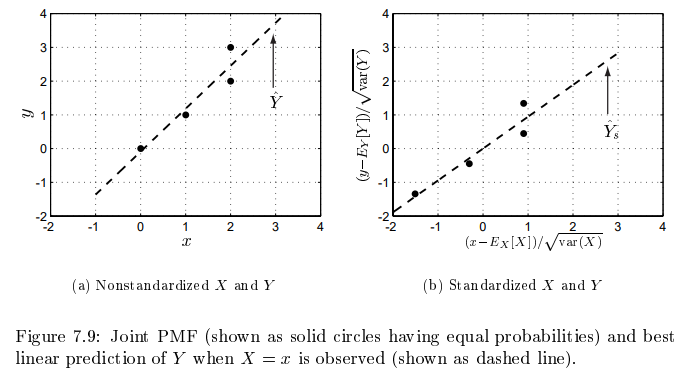

#### Answer:

[place answer here]

***
### 7.39 (t,f)

Prove that the minimum mean square error of the optimal linear predictor is given by

$$
\begin{equation}
\begin{split}
mse_{\min} &= \mathbb{E}_{X,Y}[(Y - (a_{opt}X + b_{opt}Y))^2] \\
           \\
           &= var(Y)(1-\rho_{X,Y}^2)
\end{split}
\end{equation}
$$

Use this formula to check your result for Problem 7.38.

#### Answer:

[place answer here]

***
### 7.40 😃 (w)

In this problem we compare the prediction of a random variable with and without the knowledge of a second random variable outcome. Consider the join PMF shown below. First determine the optimal linear prediction of $Y$

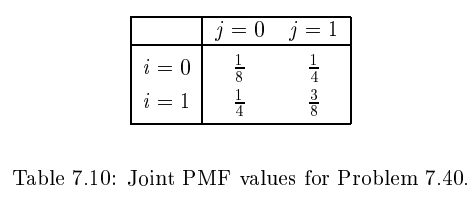

without any knowledge of the outcome of $X$ (see Section 6.6). Also, compute the minimum mean square error. Next, determine the optimal linear prediction of $Y$ based on the knowledge that $X=x$ and compute the minimum mean square error. Plot the predictions versus $x$ in the plane. How do the minimum mean square errors compare?

#### Answer:



***
### 7.41 😃 (w,c)

For the joint PMF of height and weight shown in Figure 7.1 determine the best linear prediction of weight based on a knowledge of height. 

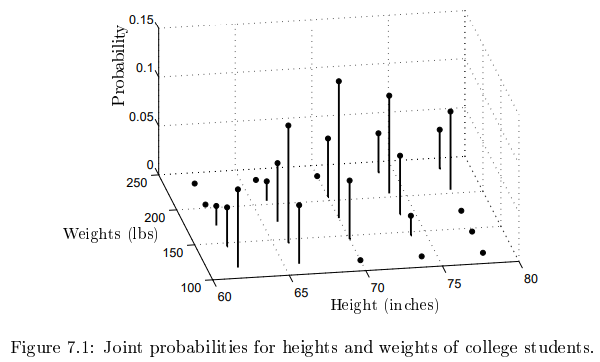

You will need to use Table 4.1 as well as a compute to carry out this problem. Does your answer seem reasonable? Is the prediction of a person's weight if the height is 70 inches reasonable? How about if the height is 78 inches? Can you explain the difference?

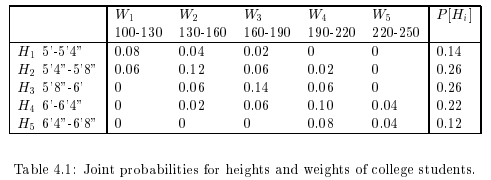

#### Answer:

[place answer here]

***
### 7.42 (f)

Prove that the transformed random variable 

$$
\frac{X - \mathbb{E}_X[X]}{\sqrt{var(x)}}
$$

has an expected value of $0$ and a variance of $1$.

#### Answer:

[place answer here]

***
### 7.43 😃 (w)

The linear prediction of one random variable based on the outcome of another becomes more difficult if noise is present. We model noise as the addition of an uncorrelated random variable. Specifically, assume that we wish to predict $X$ based on observing $X+N$, where $N$ represents the noise. If $X$ and $N$ are both zero mean random variables that are uncorrelated with each other, determine the correlation coefficient between $W=X$ and $Z=X+N$. How does it depend on the power in $X$, which is defined as $\mathbb{E}_X[X^2]$, and the power in $N$, also defined as $\mathbb{E}_N[N^2]$?

#### Answer:

[place answer here]

***
### 7.44 (w)

Consider $var(X+Y)$, where $X$ and $Y$ are correlated random variables. How is the variance of a sum of random variables affected by the correlation between the random variables? Hint: Express the variance of the sum of the random variables using the correlation coefficient:

$$
\rho_{X,Y} = \frac{ \text{cov}(X,Y) }{ \sqrt{var(X)var(Y)} }.
$$

#### Answer:

[place answer here]

***
### 7.45  (f)

Prove that if $Y=aX+b$, where $a,b$ are constants, then $\rho_{X,Y} = 1$ if $a>0$ and $\rho_{X,Y} = -1$ if $a<0$.

#### Answer:

[place answer here]

***
### 7.46 😃 (w)

If $X\sim Ber(\frac{1}{2}), Y\sim Ber(\frac{1}{2}),$ and $X$ and $Y$ are independent, find the PMF for $Z=X+Y$. Use the characteristic function approach to do so. Compare your results to that of Problem 7.27.

#### Answer:

[place answer here]

***
### 7.47 (w)

Using characteristic functions prove that the binomial PMF has the reproducing property. That is to say, if $X\sim bin(M_X,p), Y\sim bin(M_Y,p),$ and $X$ and $Y$ are independent, then $Z=(X+Y)\sim bin(M_X+M_Y, p)$. Why does this make sense in light of the fact that a sequence of independent Bernoulli trials can be used to derive the binomial PMF?

#### Answer:

[place answer here]

***
### 7.48 😃 (c)

Using the joint PMF shown in Table 7.7 generate realizations of the random vector $(X,Y)$ and estimate its joint and marginal PMFs. Compare your estimated results to the true values.

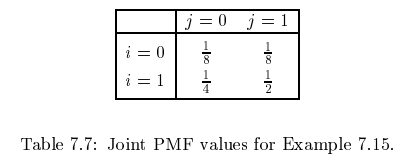

#### Answer:

[place answer here]

***
### 7.49 😃 (c)

For the joint PMF shown in Table 7.7 determine the correlation coefficient. 

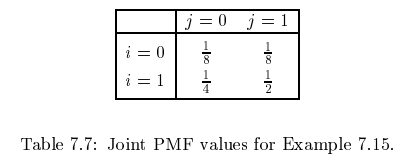

Next use a computer simulation to generate realizations of the random vector $(X,Y)$ and estimate the correlation coefficient as 

$$
\hat\rho_{X,Y} = 
\frac{\frac{1}{M}\sum_{m=1}^{M}{x_my_m - \bar{x}\bar{y}}}
{\sqrt{\big(\frac{1}{M}\sum_{m=1}^{M}{x_m^2 - \bar{x}^2}\big) \big(\frac{1}{M}\sum_{m=1}^{M}{y_m^2 - \bar{y}^2}\big)}}
$$

where

$$
\begin{equation}
    \begin{split}
        \bar{x} &= \frac{1}{M}\sum_{m=1}^{M}{x_m}\\
                \\
        \bar{y} &= \frac{1}{M}\sum_{m=1}^{M}{y_m}
    \end{split}
\end{equation}
$$

and $(x_m,y_m)$ is the $m^{th}$ realization.

#### Answer:

[place answer here]

***
### 7.50 (w,c)

If $X\sim geom(p),$ and $X$ and $Y$ are independent, show that the PMF of $Z=X+Y$ is given by 

$$
p_Z[k] = p^2(k-1)(1-p)^{k-2}
$$

for $k=2,3,\dots$. To avoid errors use the discrete unit step function. Next, for $p=\frac{1}{2}$ generate realizations for $Z$ by first generating realizations of $X$, then generate realizations of $Y$ and adding each pair of realizations together. Estimate the PMF of $Z$ and compare it to the true PMF.

#### Answer:

[place answer here]

***
### 7.51 (w,c)

Using the joint PMF given in Table 7.5 determine the covariance to show that it is nonzero and hence $X$ and $Y$ are correlated. Next, use the procedure of Problem 7.35 to determine the transformed random variables $W$ and $Z$ that are uncorrelated. Verify that $W$ and $Z$ are uncorrelated by estimating the covariance as

$$
\widehat {cov(W,Z)} = \frac{1}{M}\sum_{m=1}^{M}{w_mz_m - \bar{w}\bar{z}}
$$

where

$$
\begin{equation}
    \begin{split}
        \bar{w} &= \frac{1}{M}\sum_{m=1}^{M}{w_m}\\
                \\
        \bar{z} &= \frac{1}{M}\sum_{m=1}^{M}{z_m}
    \end{split}
\end{equation}
$$

and $(w_m,z_m)$ is the $m^{th}$ realization. Be sure to generate the realizations of $W$ and $Z$ as $w_m = x_m$ and $z_m = ax_m + y_m$, where $(x_m,y_m)$ is the $m^{th}$ realization of $(X,Y)$.

#### Answer:

[place answer here]